Problem 1: Python & Data Exploration

1. 148 is the number of data points and 4 is the number of features.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns
#print(iris)
print(X.shape)

(148, 4)


2.

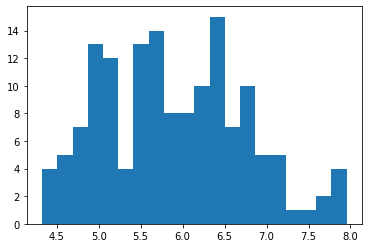

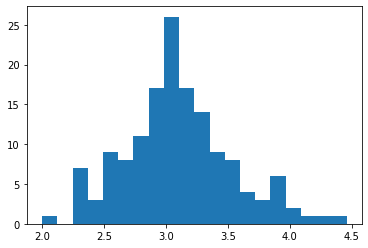

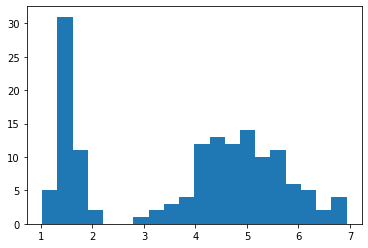

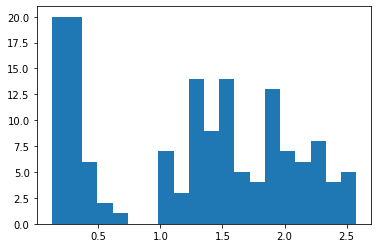

In [37]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns
binnum = 20 #number of bins
for i in range(0, X.shape[1]):
    plt.hist(X[:,i], binnum)
    plt.show()

3.

In [38]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns SO ARE THESE THE FEATURES
print(np.mean(X, axis = 0)) # axis = 0 is row axis
print(np.var(X, axis = 0))
print(np.std(X, axis = 0))

[5.90010376 3.09893092 3.81955484 1.25255548]
[0.694559   0.19035057 3.07671634 0.57573564]
[0.83340207 0.43629184 1.75405711 0.75877246]


4.

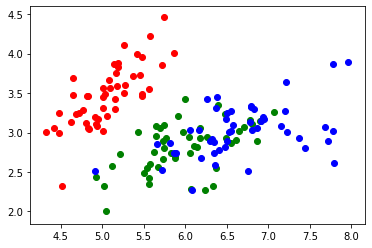

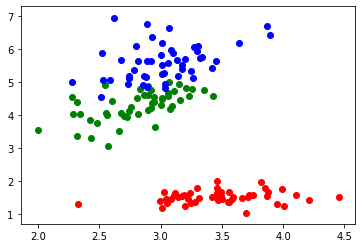

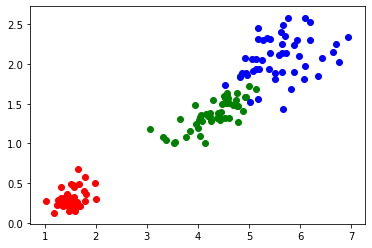

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns
colors = ['r','g','b']
for i in range(0,3): # for each of the features
    for j in np.unique(Y): # go through each of those Y slices (0,1,2)
        # compare 1,2 2,3 3,4 -> 0,1 1,2 2,3
        # slices = 0 red 1 green 2 blue
        # scatter plot all points where Y=feature, Y=next feature, with this color
        plt.scatter(X[Y==j,i], X[Y==j,i+1], color=colors[int(j)])
    plt.show()

In [ ]:
Problem 2: Basic Linear Algebra
1. A matrix has an inverse when its determinant is not equal to 0.
2. Determinant = ||; of A and B
|A| = 1(-1*2 - 1*3) - 2(2*2 - 1*1) + 2(2*3 - 1*-1)
    = 1(-2-3) - 2(4-1) + 2(6+1)
    = -5 - 6 + 14
    = 3
|B| = 0(-4*1 - -2*4) - -3(1*1 - -2*-3) + -2(1*4 - -4*-3)
    = 0 + 3(1-6) - 2(4-12)
    = -15 + 16
    = 1
3. Inverse of A and B
A)
Matrix of Minors
|-6 2 7 |
|-2 0 1 |
| 4 -3 -5|
Matrix of Cofactors
|-6 -2 7 |
|2 0 -1 |
| 4 3 -5|
Adjugate
|-6 2 4 |
|-2 0 3 |
| 7 -1 -5|
1/Determinant * Adjugate
1/3 * Adjugate = Inverse of A = 
|-2 2/3 4/3 |
|-2/3 0 1 |
| 7/3 -1/3 -5/3|

B)
Matrix of Minors
|4 7 16 |
|5 7 9 |
|2 2 3 |
Matrix of Cofactors
|4 -7 16 |
|-5 7 9 |
|2 -2 3 |
Adjugate
|4 -5 2 |
|-7 7 -2 |
|16 9 3 |
1/Determinant * Adjugate
1/1 * Adjugate = Inverse of B = 
|4 -5 2 |
|-7 7 -2 |
|16 9 3 |

4.
Inverse of A Transpose =
|-2 -2/3 7/3 |
|2/3 0 -1/3 |
|4/3 1 -5/3|
Inverse of B Transpose = 
|4 -7 16 |
|-5 7 9 |
|2 -2 3 |

5.
Inverse of C = A Inverse * B Inverse =
|-8 -10/3 8/3|
|14/3 0 -2|
|112/3 -3 -5|



Problem 3: kNN predictions

1. The main pro for increasing the value of K is to have clearer boundaries so be able to see which points are outliers, which prevents underfitting. The main con of increasing the value of K is that the model might become too simple since there will be a lot of points of a different group (like yellow in a green zone) and could lead to overfitting.

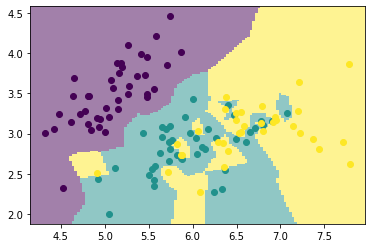

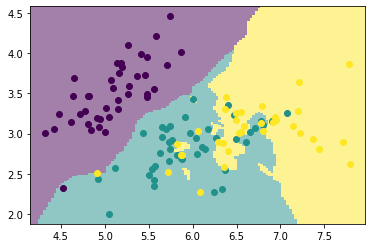

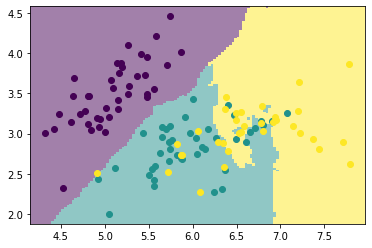

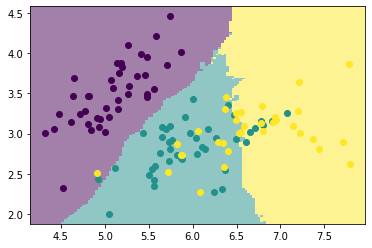

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We’ll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append(’/path/to/parent/dir/’);
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some pathological way,
# as the Iris data are)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8); # split data into 80/20 train/validation

K = [1,5,10,50]
for i in K:
    # make the classifier
    knn = ml.knn.knnClassify() # create the object and train it
    knn.train(Xtr[:,0:2], Ytr, i) # where K is an integer, e.g. 1 for nearest neighborprediction
    #YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
    ml.plotClassify2D(knn, Xtr[:,0:2], Ytr)
    plt.show()
    
# Alternatively, the constructor provides a shortcut to "train":
#knn = ml.knn.knnClassify( Xtr, Ytr, K );
#YvaHat = predict( knn, Xva );

#ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)



2. Usually, one would want to pick a K value where the error is the lowest since one's goal would be to have accurate results. Based on these plots I'd recommend a K value of 5 since the lowest error is located there and the error is about the same at the value of K.

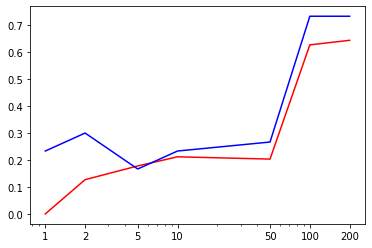

In [16]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We’ll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append(’/path/to/parent/dir/’);
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some pathological way,
# as the Iris data are)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8); # split data into 80/20 train/validation

# make the classifier
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighborprediction
#YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva

# Alternatively, the constructor provides a shortcut to "train":
#knn = ml.knn.knnClassify( Xtr, Ytr, K );
#YvaHat = predict( knn, Xva );

#ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)
errTrainingData = []
errValidationData = []

K=[1,2,5,10,50,100,200];
#huh =['o','o','o','o','o','o','o']
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()# TODO: complete code to train model
    learner.train(Xtr[:,0:2], Ytr, k)
    Yhat = learner.predict(Xtr[:,0:2]) # TODO: predict results on training data
    errTrainingData.append(float(np.sum(Yhat != Ytr))/float(Xtr.shape[0])) # TODO: count what fraction of predictions are wrong
    YvaHat = learner.predict(Xva[:,0:2]) #TODO: repeat prediction / error evaluation for validation data
    errValidationData.append(float(np.sum(YvaHat != Yva))/float(Xva.shape[0]))

plt.semilogx(K, errTrainingData, color = 'r') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errValidationData, color = 'b')
plt.xticks(K,K) #values, labels
plt.show()


3. In this case I'd recommend. Based on these plots I'd recommend a K value of 5 since the lowest error is located there and the error is about the same at the value of K.

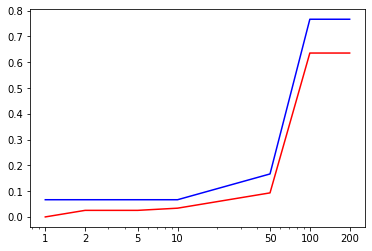

In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We’ll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append(’/path/to/parent/dir/’);
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some pathological way,
# as the Iris data are)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8); # split data into 80/20 train/validation

# make the classifier
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighborprediction
#YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva

# Alternatively, the constructor provides a shortcut to "train":
#knn = ml.knn.knnClassify( Xtr, Ytr, K );
#YvaHat = predict( knn, Xva );

#ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)
errTrainingData = []
errValidationData = []

K=[1,2,5,10,50,100,200];
#huh =['o','o','o','o','o','o','o']
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()# TODO: complete code to train model
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr) # TODO: predict results on training data
    errTrainingData.append(float(np.sum(Yhat != Ytr))/float(Xtr.shape[0])) # TODO: count what fraction of predictions are wrong
    YvaHat = learner.predict(Xva) #TODO: repeat prediction / error evaluation for validation data
    errValidationData.append(float(np.sum(YvaHat != Yva))/float(Xva.shape[0]))

plt.semilogx(K, errTrainingData, color = 'r') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errValidationData, color = 'b')
plt.xticks(K,K)
plt.show()


In [ ]:
1.	
I	P(xi=0|y=-1) P(xi=1|y=-1) P(xi=0|y=1) P(xi=1|y=1)
1	    3/6	         3/6 	     1/4 	   3/4
2	    1/6	         5/6 	     4/4 	   0/4
3	    2/6	         4/6 	     1/4 	   3/4
4	    1/6	         5/6 	     2/4 	   2/4
5	    4/6	         2/6 	     3/4 	   1/4

P(y=-1) = 6/10 = 3/5
P(y=1) = 4/10 = 2/5
2.	For x = (0 0 0 0 0)
Compare chance for x = (0 0 0 0 0) between y=-1 and y=1 and choose the larger one
Y=-1 -> P(y=-1) * P(x= 0 0 0 0 0|y=-1) = 3/5 * 3/6*1/6*2/6*1/6*4/6 = 0.00185
Y=1 -> P(y=1) * P(x=0 0 0 0 0|y=1) = 2/5 * 1/4*4/4*1/4*2/4*3/4 = 0.00937
The predicted class would be y = 1 since 0.00937 > 0.00185

For x = (1 1 0 1 0)
Compare chance for x = (1 1 0 1 0) between y=-1 and y=1 and choose the larger one
Y=-1 -> P(y=-1) * P(x= 1 1 0 1 0|y=-1) = 3/5 * 3/6*5/6*2/6*5/6*4/6 = 0.0462
Y=1 -> P(y=1) * P(x=1 1 0 1 0|y=1) = 2/5 * 3/4*0/4*1/4*2/4*3/4 = 0.0
The predicted class would be y = -1 since 0.0462  > 0.0
3.	P(y=1|x=1 1 0 1 0) = P(y=1 & x = 1 1 0 1 0) / P(x = 1 1 0 1 0) 
= 3/4*0/4*3/4*2/4*1/4 / P(x = 1 1 0 1 0)
= 0 / P(x = 1 1 0 1 0)
= 0
4.	Joint probability shouldn’t be used in this case since it would increase the amount of possibilities. In the case of y = -1 we have 30 direct possibilities with the current naïve approach. If we looked at the possibilities for the joint approach, we would have 2^5 possibilities since each of the x values from x1-x5 have 2 possible values of 0 and 1. One should want to use a model with less possibilities/calculations so we should not use the joint model due to it having more possibilities to deal with.

5.	We don’t need to retrain the model since each of the features (x1, x2, etc.) are calculated as independent events and the loss of just x1, know author, wouldn’t affect the calculations done for x2 through x5.


In [ ]:
#Statement of Collaboration
# I didn't collaborate with anyone else when I did this homework aside from looking at the lecture slides and some Google searching.